# Python for Data Analysis
    
    AUTHOR: Dr. Wes McKinney 

### Chapter 9: Plotting and Visualization

In [193]:
# from google.colab import drive
# drive.mount('/content/drive')

In [194]:
import os
DIR = "C:\Coding\Masters\DataScience\Semana 4\Data-Analysis_Plotting_and_Visualization"
os.chdir(DIR)

In [195]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(10, 6))

# 9.1 A Brief matplotlib API Primer

In [196]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

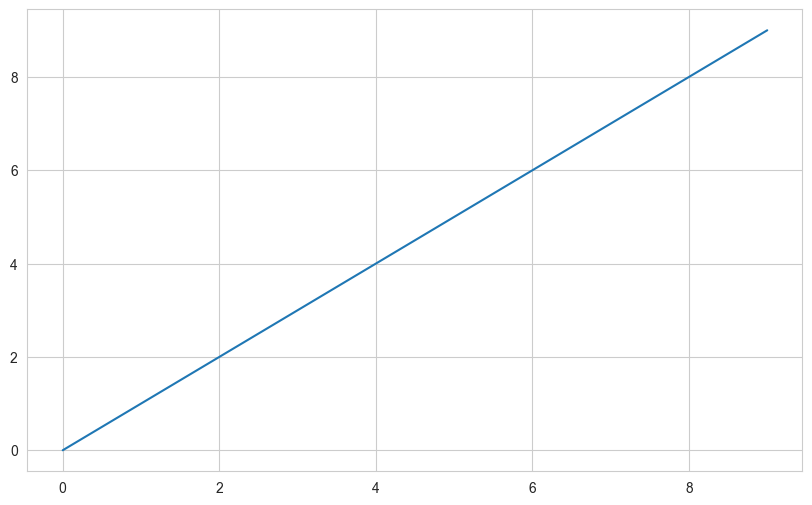

In [197]:
plt.plot(data)

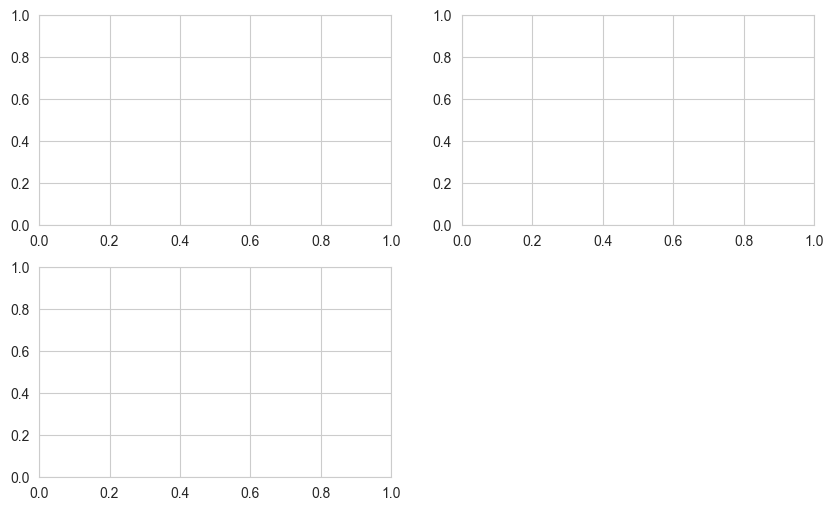

In [198]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

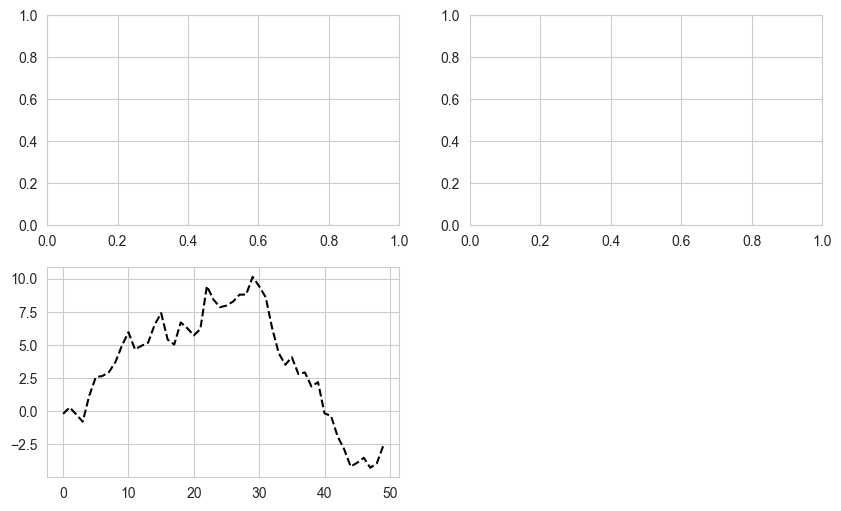

In [199]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(np.random.standard_normal(50).cumsum(), color="black", linestyle="dashed")

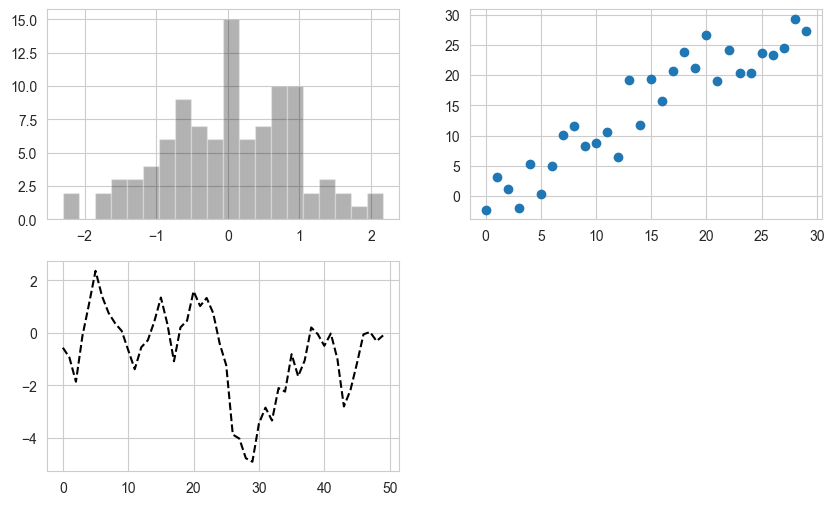

In [200]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.3);
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30));
ax3.plot(np.random.standard_normal(50).cumsum(), color="black", linestyle="dashed")

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

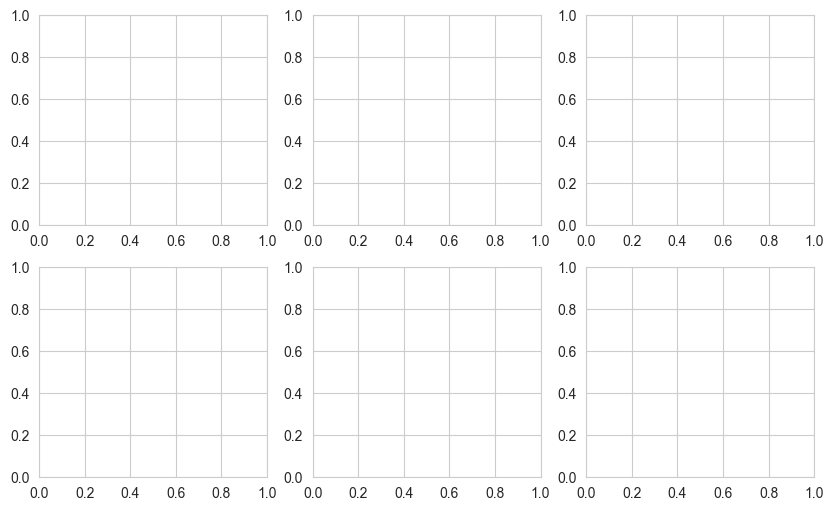

In [201]:
fig, axes = plt.subplots(2, 3)
axes

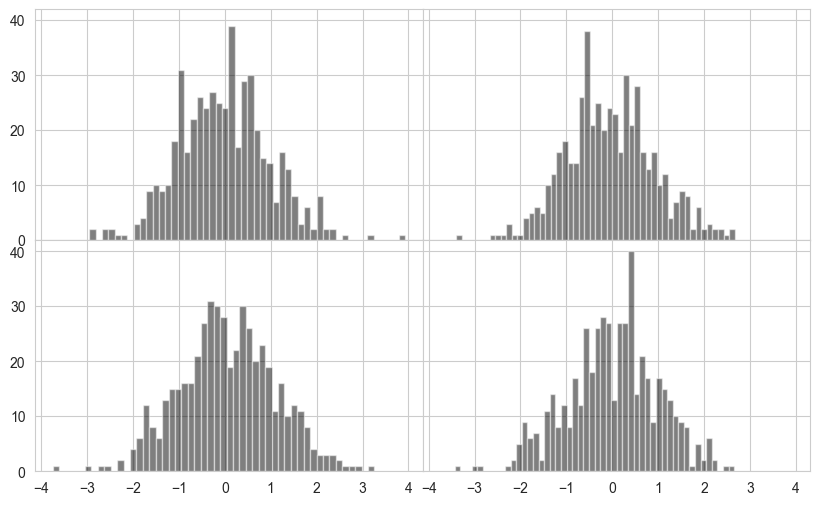

In [202]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500), bins=50, color="black", alpha=0.5)
fig.subplots_adjust(wspace=0, hspace=0)

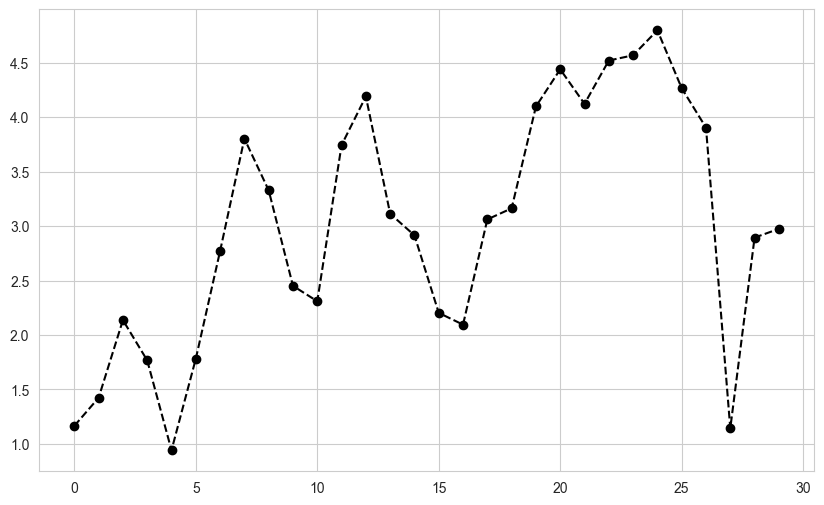

In [203]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.random.standard_normal(30).cumsum(), color="black", linestyle="dashed", marker="o");

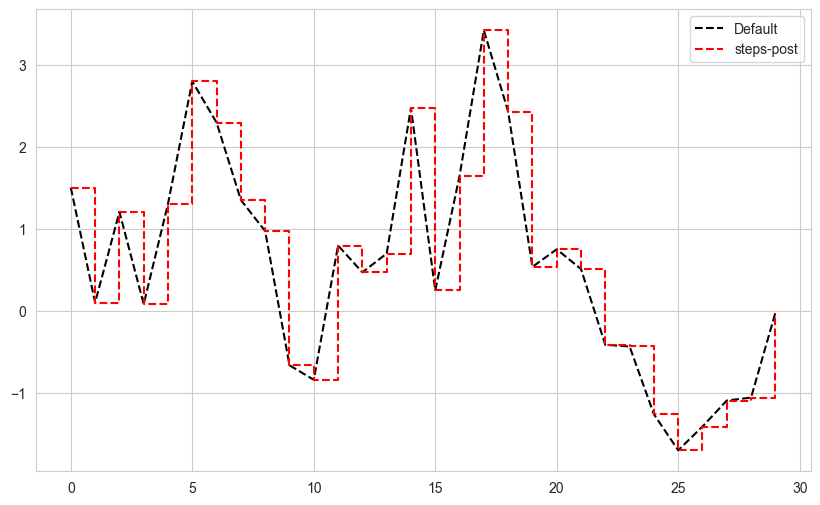

In [204]:
fig = plt.figure()
ax = fig.add_subplot()
data = np.random.standard_normal(30).cumsum()
ax.plot(data, color="black", linestyle="dashed", label="Default");
ax.plot(data, color="red", linestyle="dashed", drawstyle="steps-post", label="steps-post");
ax.legend()

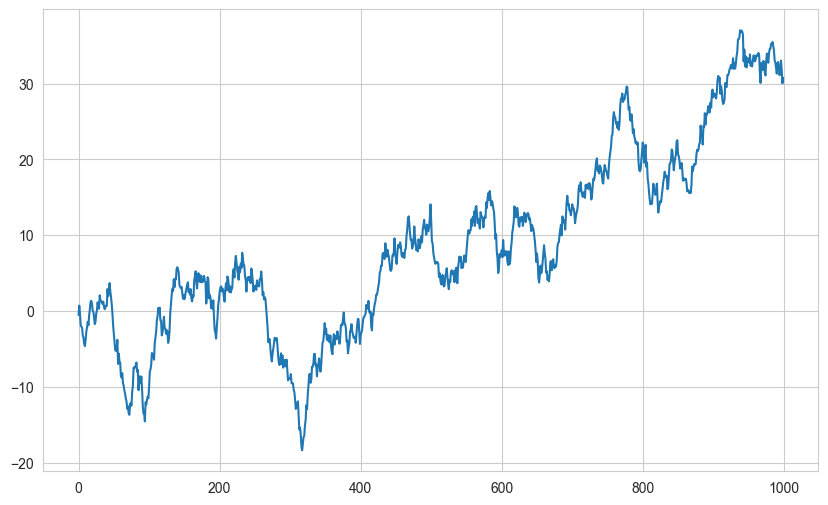

In [205]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum());

Text(0.5, 1.0, 'My first matplotlib plot')

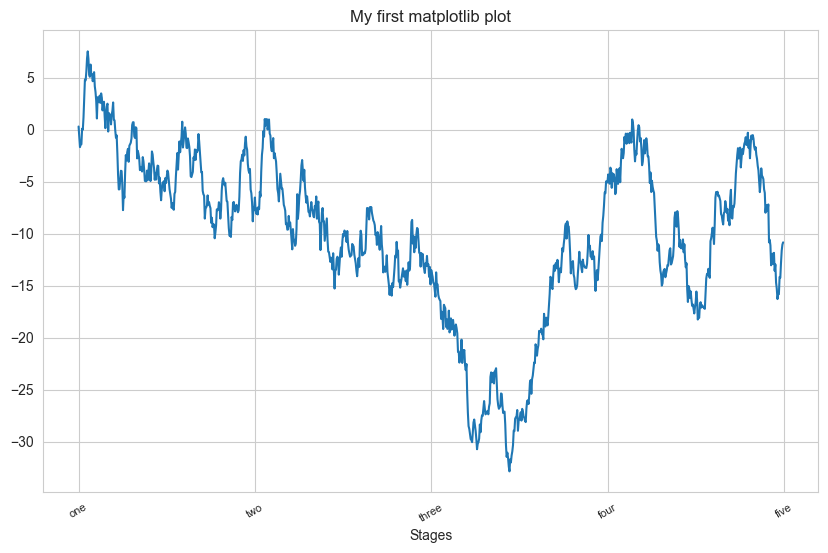

In [206]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum());
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"], rotation=30, fontsize=8)
ax.set_xlabel("Stages")
ax.set_title("My first matplotlib plot")

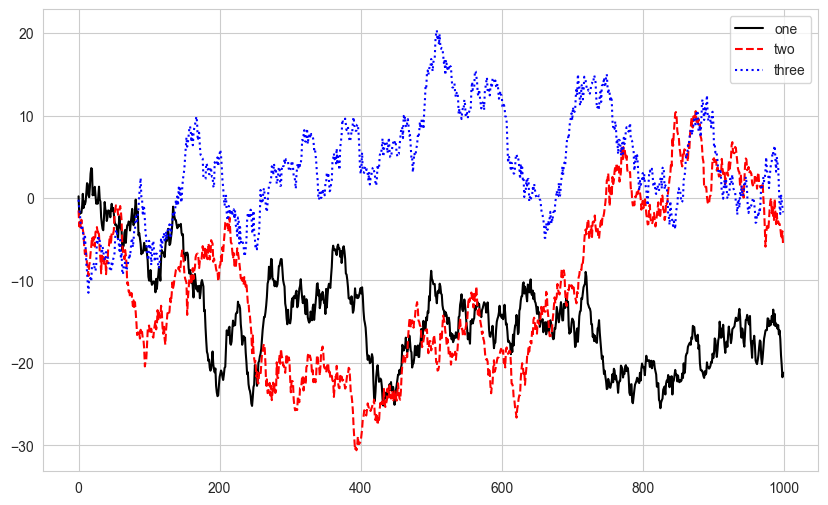

In [228]:
fig, ax = plt.subplots()
ax.plot(np.random.randn(1000).cumsum(), color="black", label="one");
ax.plot(np.random.randn(1000).cumsum(), color="red", linestyle="dashed", label="two");
ax.plot(np.random.randn(1000).cumsum(), color="blue", linestyle="dotted", label="three");
ax.legend()

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

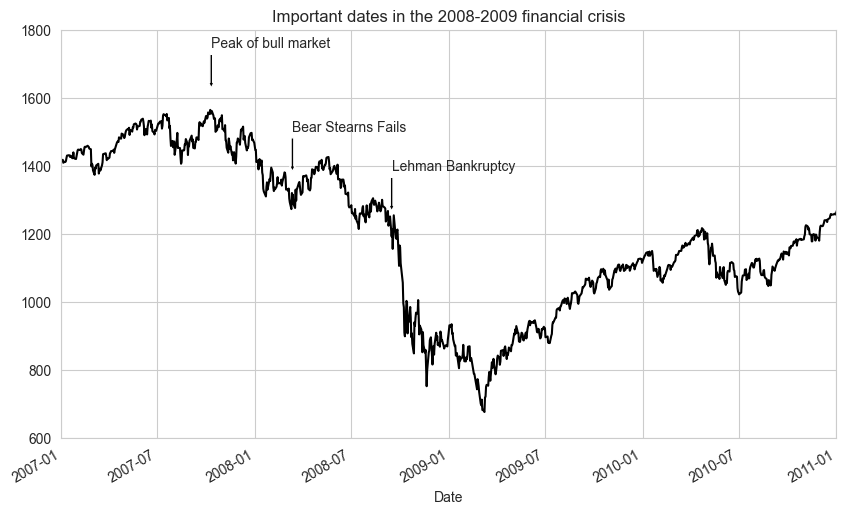

In [230]:
from datetime import datetime

fig, ax = plt.subplots()

data = pd.read_csv("spx.csv", index_col=0, parse_dates=True)
spx = data["SPX"]

spx.plot(ax=ax, color="black")

crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor="black", headwidth=4, width=2,
                                headlength=4),
                horizontalalignment="left", verticalalignment="top")

# Zoom in on 2007-2010
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])

ax.set_title("Important dates in the 2008-2009 financial crisis")

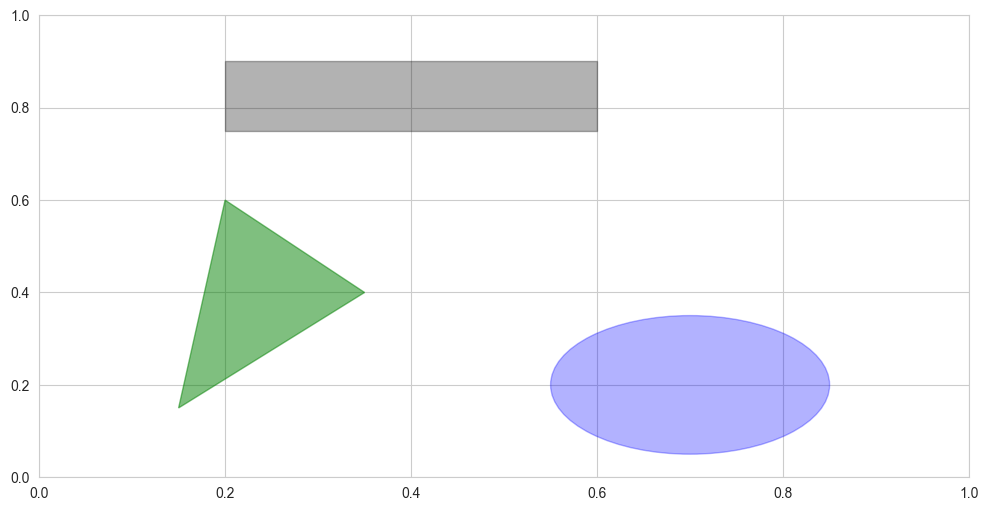

In [209]:
fig, ax = plt.subplots(figsize=(12, 6))
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color="green", alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

# 9.2 Plotting with pandas and seaborn

<Axes: >

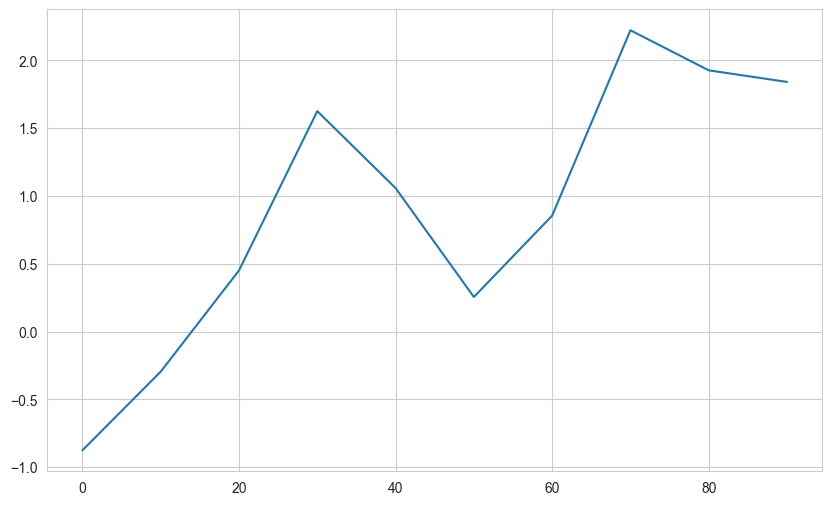

In [210]:
s = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

In [211]:
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0), columns=["A", "B", "C", "D"], index=np.arange(0, 100, 10))
df

,A,B,C,D
0,0.777407,1.067479,2.474645,-0.975044
10,1.186825,0.796260,1.928292,0.313834
20,0.399528,0.827162,0.239237,1.464438
30,0.366455,0.745309,-1.122800,1.182476
40,0.626609,2.782995,-2.737977,0.612168
50,-0.248838,4.269612,-3.609008,1.756989
60,-0.452066,6.248408,-1.743248,3.049314
70,-1.641978,6.613826,-0.584514,1.937572
80,-1.831396,5.862131,-1.017642,2.107572
90,-2.179154,5.758974,-0.528750,2.896553


<Axes: >

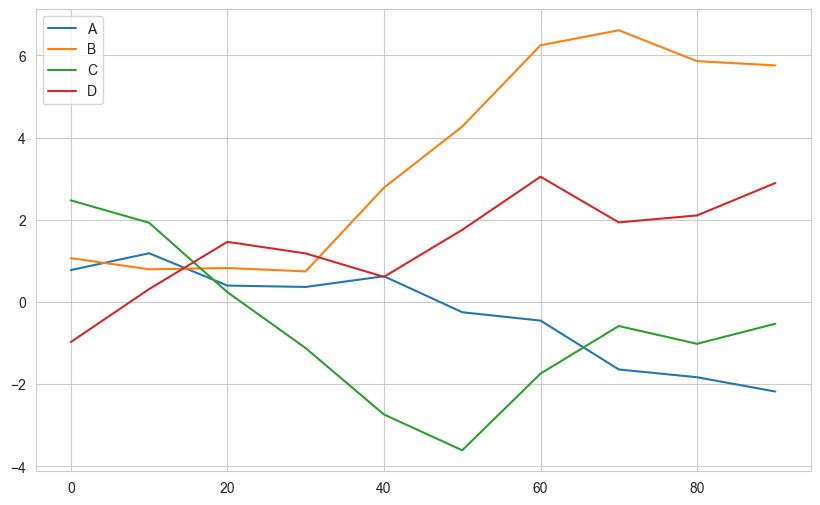

In [212]:
#plt.style.use('grayscale')
df.plot()

<Axes: >

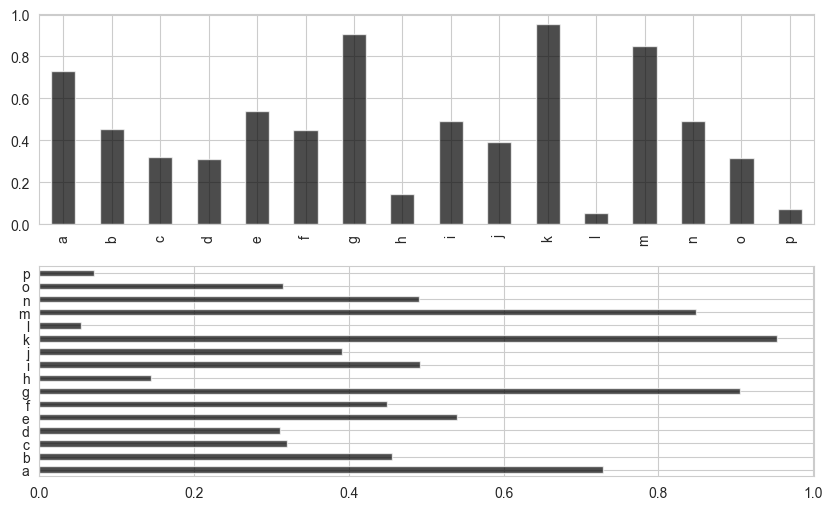

In [213]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))
data.plot.bar(ax=axes[0], color="black", alpha=0.7)
data.plot.barh(ax=axes[1], color="black", alpha=0.7)

In [214]:
np.random.seed(12348)

In [215]:
df = pd.DataFrame(np.random.uniform(size=(6, 4)),
                  index=["one", "two", "three", "four", "five", "six"],
                  columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
df

Genus,A,B,C,D
one,0.370670,0.602792,0.229159,0.486744
two,0.420082,0.571653,0.049024,0.880592
three,0.814568,0.277160,0.880316,0.431326
four,0.374020,0.899420,0.460304,0.100843
five,0.433270,0.125107,0.494675,0.961825
six,0.601648,0.478576,0.205690,0.560547


<Axes: >

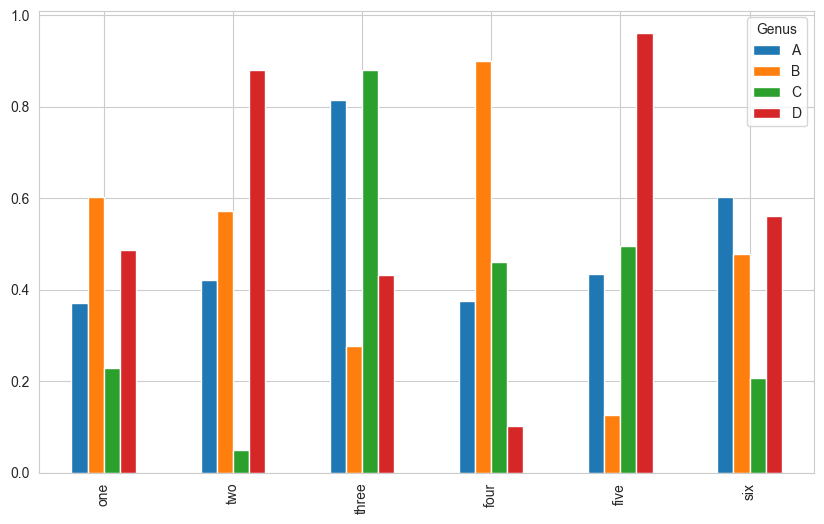

In [216]:
df.plot.bar()

<Axes: >

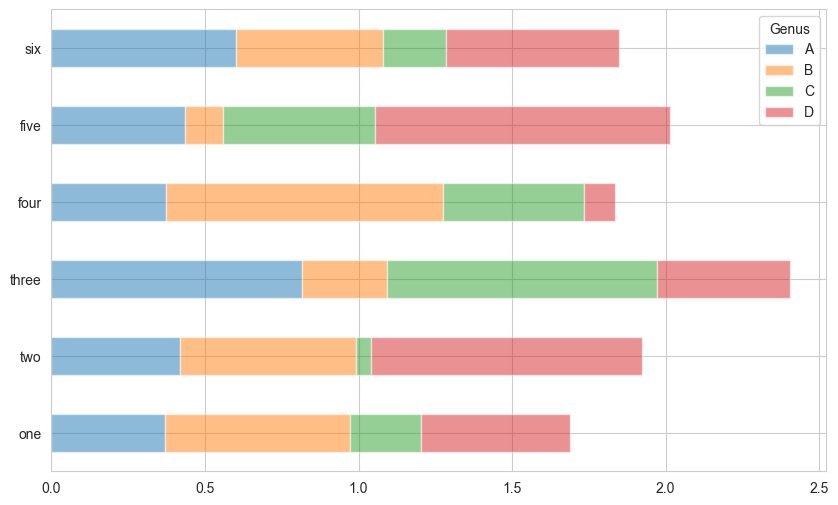

In [217]:
df.plot.barh(stacked=True, alpha=0.5)

In [218]:
tips = pd.read_csv("tips.csv")
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [219]:
party_counts = pd.crosstab(tips["day"], tips["size"])
party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [220]:
party_counts = party_counts.loc[:, 2:5]

<Axes: xlabel='day'>

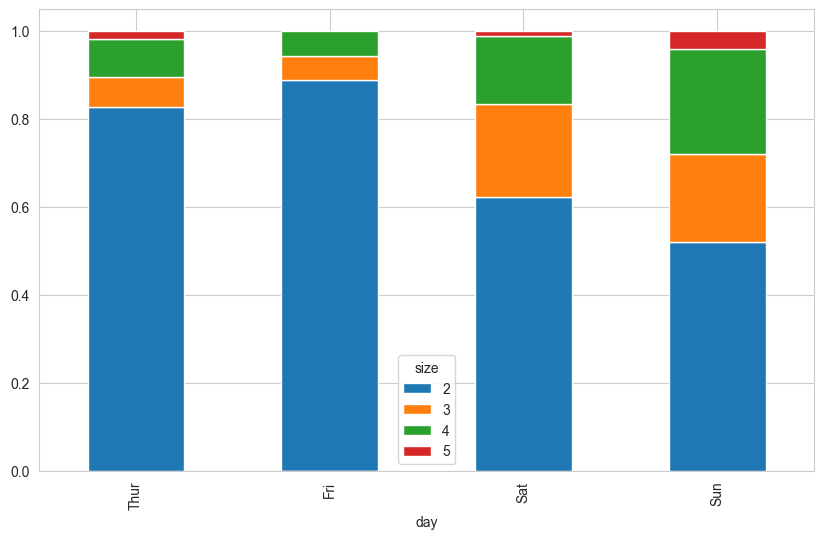

In [221]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(axis="columns"), axis="index")
party_pcts
party_pcts.plot.bar(stacked=True)

In [222]:
import seaborn as sns
tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<Axes: xlabel='tip_pct', ylabel='day'>

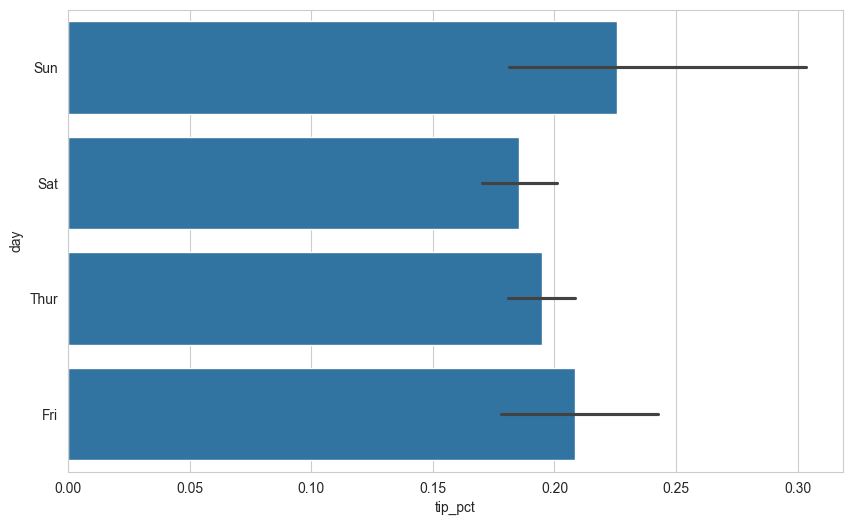

In [223]:
sns.barplot(x="tip_pct", y="day", data=tips, orient="h")

<Axes: xlabel='tip_pct', ylabel='day'>

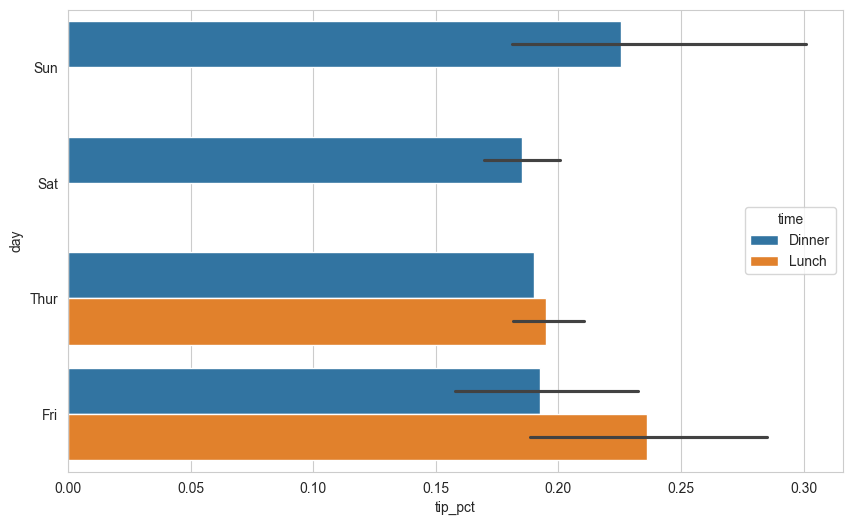

In [224]:
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")

In [225]:
sns.set_style("whitegrid")
#sns.set_palette("Greys_r")

<Axes: ylabel='Frequency'>

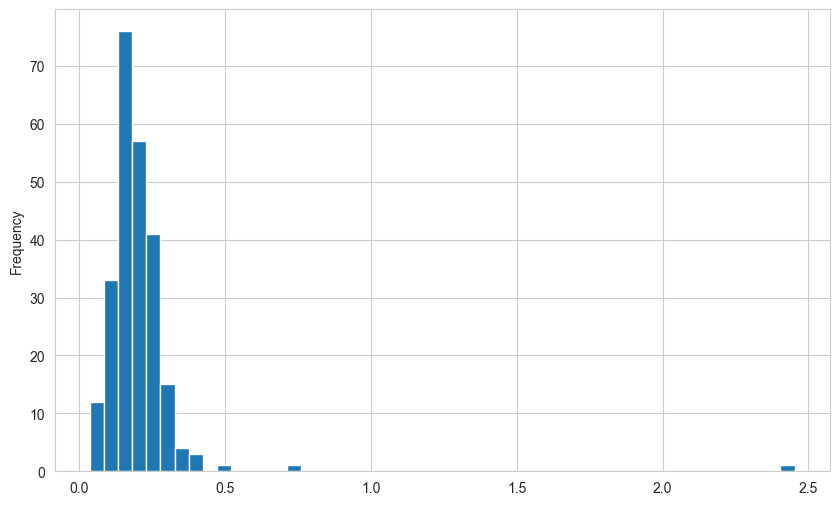

In [226]:
tips["tip_pct"].plot.hist(bins=50)

ModuleNotFoundError: No module named 'scipy'

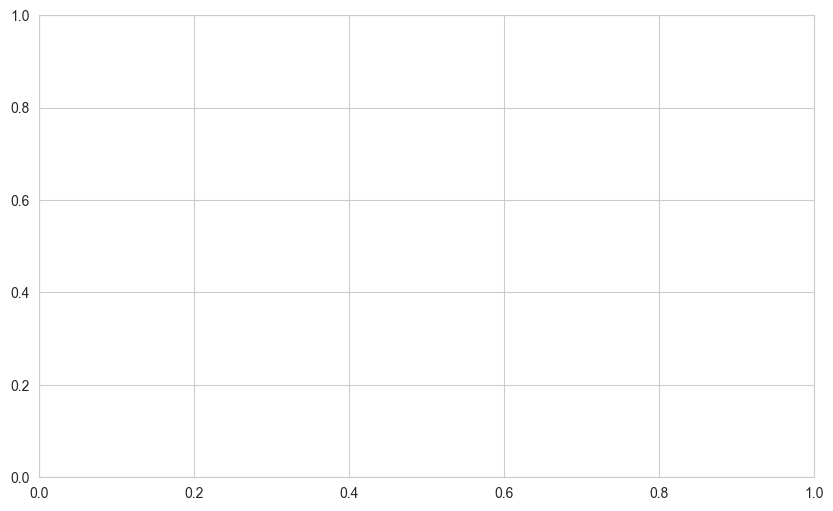

In [227]:
tips["tip_pct"].plot.density()

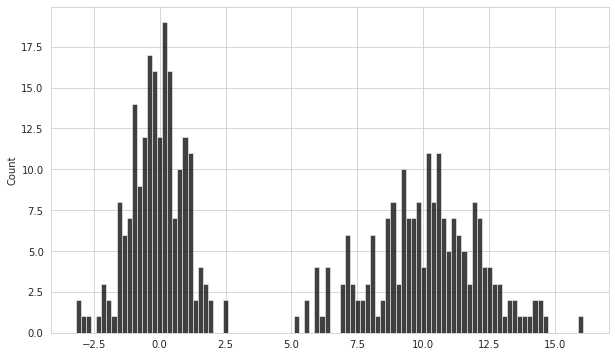

In [ ]:
comp1 = np.random.standard_normal(200)
comp2 = 10 + 2 * np.random.standard_normal(200)
values = pd.Series(np.concatenate([comp1, comp2]))

sns.histplot(values, bins=100, color="black")

In [ ]:
macro = pd.read_csv("macrodata.csv")
data = macro[["cpi", "m1", "tbilrate", "unemp"]]
trans_data = np.log(data).diff().dropna()
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log(m1) versus log(unemp)')

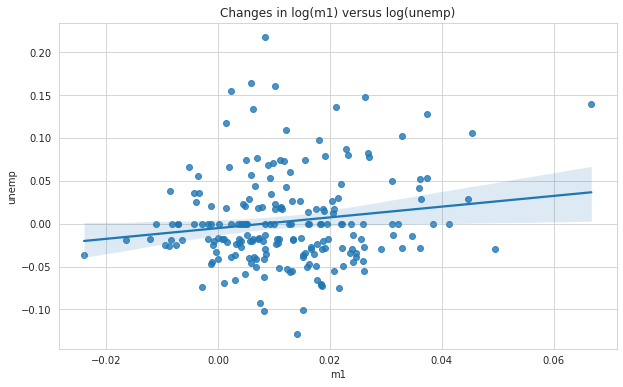

In [ ]:
ax = sns.regplot(x="m1", y="unemp", data=trans_data)
ax.set_title("Changes in log(m1) versus log(unemp)")

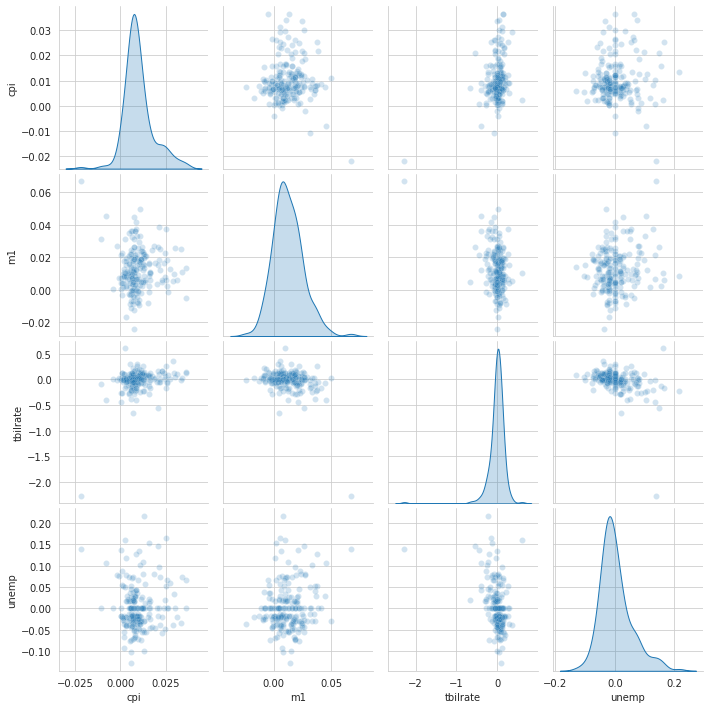

In [ ]:
sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha": 0.2})

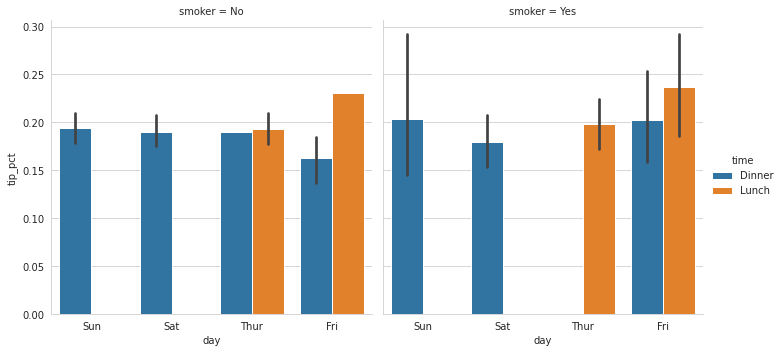

In [ ]:
sns.catplot(x="day", y="tip_pct", hue="time", col="smoker", kind="bar", data=tips[tips.tip_pct < 1])

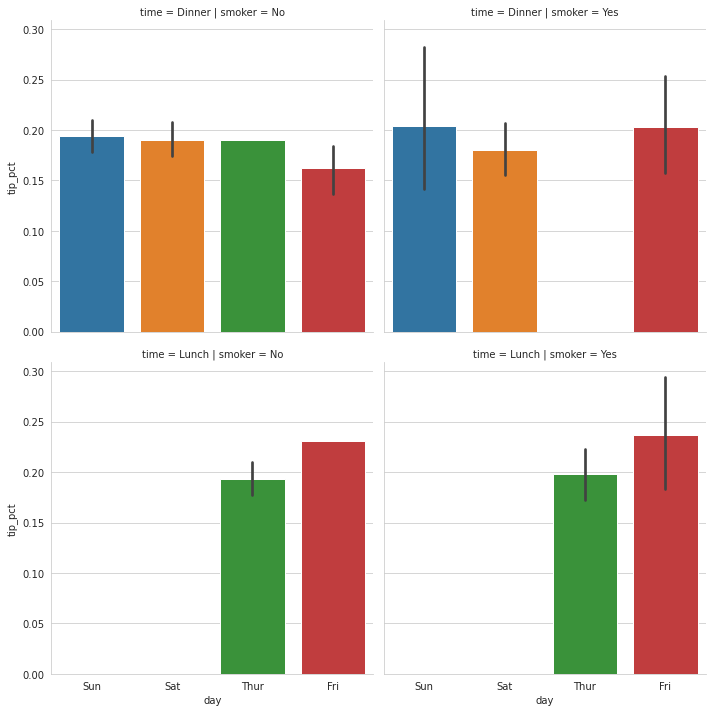

In [ ]:
sns.catplot(x="day", y="tip_pct", row="time", col="smoker", kind="bar", data=tips[tips.tip_pct < 1])

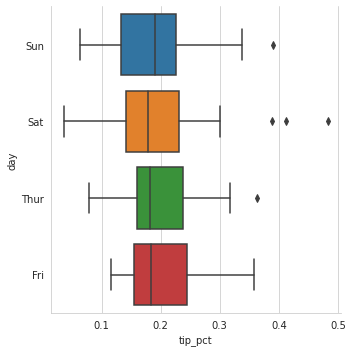

In [ ]:
sns.catplot(x="tip_pct", y="day", kind="box", data=tips[tips.tip_pct < 0.5])